In [31]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
import numpy as np
import matplotlib.pyplot as plt

In [32]:
ENTRADA = np.array([[1,0,0,0,0,0,1],
                    [0,1,0,0,0,1,0],
                    [0,0,1,0,1,0,0],
                    [0,0,0,1,0,0,0],
                    [0,0,1,0,1,0,0],
                    [0,1,0,0,0,1,0],
                    [1,0,0,0,0,0,1]
                    ])
KERNEL = np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]])

In [33]:
ENTRADA = np.array([[1,0,0,0,0,0,1],
                    [0,1,0,0,0,1,0],
                    [0,0,1,0,1,0,0],
                    [0,0,0,1,0,0,0],
                    [0,0,1,0,1,0,0],
                    [0,1,0,0,0,1,0],
                    [1,0,0,0,0,0,1]])

Kernel1 = np.array([[0,-1,0],
                    [-1,1,-1],
                    [0,-1,0]
                    ])

Kernel2 = np.array([[0,0,0],
                    [0,1,0],
                    [0,0,0]
                    ])

In [34]:
input_shape = (28, 28, 1)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical (Y_test, num_classes = 10)

# Normalization
for i in range(X_train.shape[0]):
    X_train[i] = (X_train[i]-X_train[i].mean())/X_train[i].std()

for i in range(X_test.shape[0]):
    X_test[i] = (X_test[i]-X_test[i].mean())/X_test[i].std()


In [35]:
# --- hiperparámetros ---
F = 4   #-- cantidad de filtros o de mapas de características --
K = 3   #-- tamaño del kernel o máscara ---
S = 1   #-- stride ---
P = 0   #-- padding ---
FUN = "relu"   #-- función de activación de la capa de convolucion --
PS = 2  #-- tamaño para la ventana de pooling  --

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(F, kernel_size=K, strides=(S,S), activation=FUN))
model.add(MaxPooling2D(pool_size=(PS,PS)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 4)         40        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 4)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 676)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                6770      
                                                                 
Total params: 6810 (26.60 KB)
Trainable params: 6810 (26.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile('SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
LOTES = 2
EPOCAS  = 2

# entrena el modelo y guarda la historia del progreso
es = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.001)
H = model.fit(x = X_train, y = Y_train, batch_size=LOTES, validation_data = (X_test, Y_test), epochs=EPOCAS, callbacks=[es])

# H = model.fit(x = X_train, y = Y_train, batch_size = LOTES, epochs = EPOCAS, validation_data = (X_test, Y_test))

print("Epocas = %d" % es.stopped_epoch)


Epoch 1/2
30000/30000 [==============================] - 33s 1ms/step - loss: 0.2527 - accuracy: 0.9252 - val_loss: 0.1310 - val_accuracy: 0.9618
Epoch 2/2
30000/30000 [==============================] - 32s 1ms/step - loss: 0.1216 - accuracy: 0.9643 - val_loss: 0.1089 - val_accuracy: 0.9701
Epocas = 0


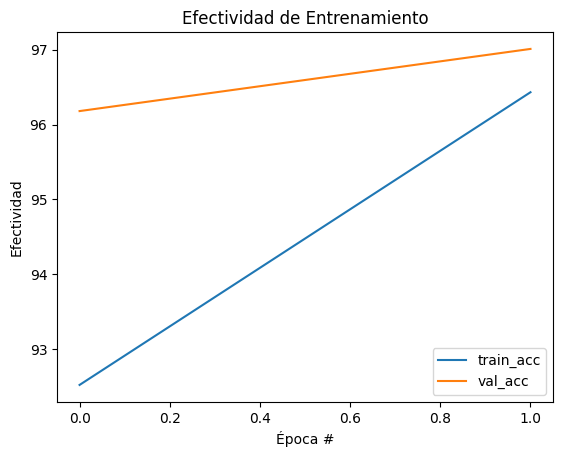

In [40]:
# dibuja accuracy del progreso del entrenamiento

# N = np.arange(0, EPOCAS)
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")

In [41]:
# evalua el modelo con los datos de validacion
pred = model.evaluate(X_test, Y_test, batch_size = LOTES)

print("\nEfectividad del modelo con datos de validación: %6.2f%%" % (pred[1]*100))

5000/5000 [==============================] - 4s 765us/step - loss: 0.1089 - accuracy: 0.9701

Efectividad del modelo con datos de validación:  97.01%
